In [54]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt


In [55]:
df = pd.read_csv('/Users/goutham/Downloads/Data Analytics Hackathon Dataset/iraste_nxt_cas.csv')

In [56]:
df['Alert'] = df['Alert'].str.split('_').str[1]

In [57]:
def convert_to_hours(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h + m / 60 + s / 3600


In [58]:
df['Hour'] = df['Time'].apply(convert_to_hours)


In [59]:
vehicle_counts = df['Vehicle'].value_counts()
vehicles_gt_100 = vehicle_counts[vehicle_counts > 100].index
df = df[df['Vehicle'].isin(vehicles_gt_100)]


In [60]:
df['Lat'] = df['Lat'].round(3)
df['Long'] = df['Long'].round(3)


In [61]:
df.dropna(inplace=True)

In [62]:
grouped_data = df.groupby(['Lat', 'Long', 'Alert']).size().reset_index(name='Count')

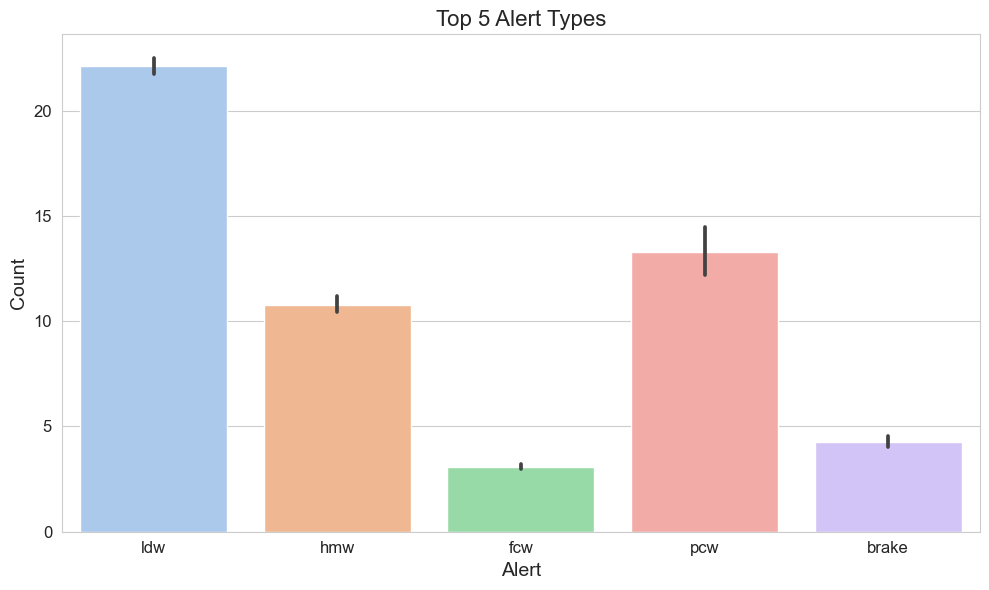

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Assuming 'grouped_data' DataFrame is defined earlier in your code

# Set the style of the plot
sns.set_style("whitegrid")

# Create a color palette for the plot
colors = sns.color_palette("pastel")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Alert', y='Count', data=grouped_data, order=grouped_data['Alert'].value_counts().index[:5], palette=colors)

# Add a title and labels
plt.title('Top 5 Alert Types', fontsize=16)
plt.xlabel('Alert', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [91]:
import reverse_geocoder as rg

# Define a function to get the nearest city or state name from latitude and longitude
def get_nearest_city_or_state(lat, long):
    result = rg.search((lat, long), mode=1)
    if result:
        # Extract city or state name from the result
        city = result[0]['name']
        state = result[0]['admin1']
        if city:
            return city
        else:
            return state or "Unknown"  # Return state if available, otherwise return "Unknown"
    else:
        return "Unknown"  # Return "Unknown" if location not found

# Example usage:
lat = 21.141  # Example latitude
long = 79.078  # Example longitude
print(get_nearest_city_or_state(lat, long))


Nagpur
